In [1]:
from mftool import Mftool
import numpy as np 
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import seaborn as sns
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline
import mplfinance as mpf # Matplotlib finance
import yfinance as yf
from datetime import date
from nsepy import get_history


In [3]:
flexicap = {}
mf = Mftool()
result = mf.get_available_schemes('Flexi Cap')
for scheme_code, scheme in result.items():
    if 'Direct' in scheme and 'Growth' in scheme:
        #print(scheme_code, scheme)
        flexicap[scheme_code] = scheme

In [4]:
hist_nav = []
for mutual_fund_code, mutual_fund in flexicap.items():
    df = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
    df['schemeName'] = mutual_fund
    scheme_name = df.schemeName[0].split()[0].upper()
    df[f'{scheme_name}'] = df['nav'].astype(float)
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
    df = df.sort_values('date').reset_index(drop=True)
    df = df.set_index((df.date)).drop('date', axis=1)
    df.drop(['nav','dayChange', 'schemeName'], axis=1, inplace=True)
    hist_nav.append(df)

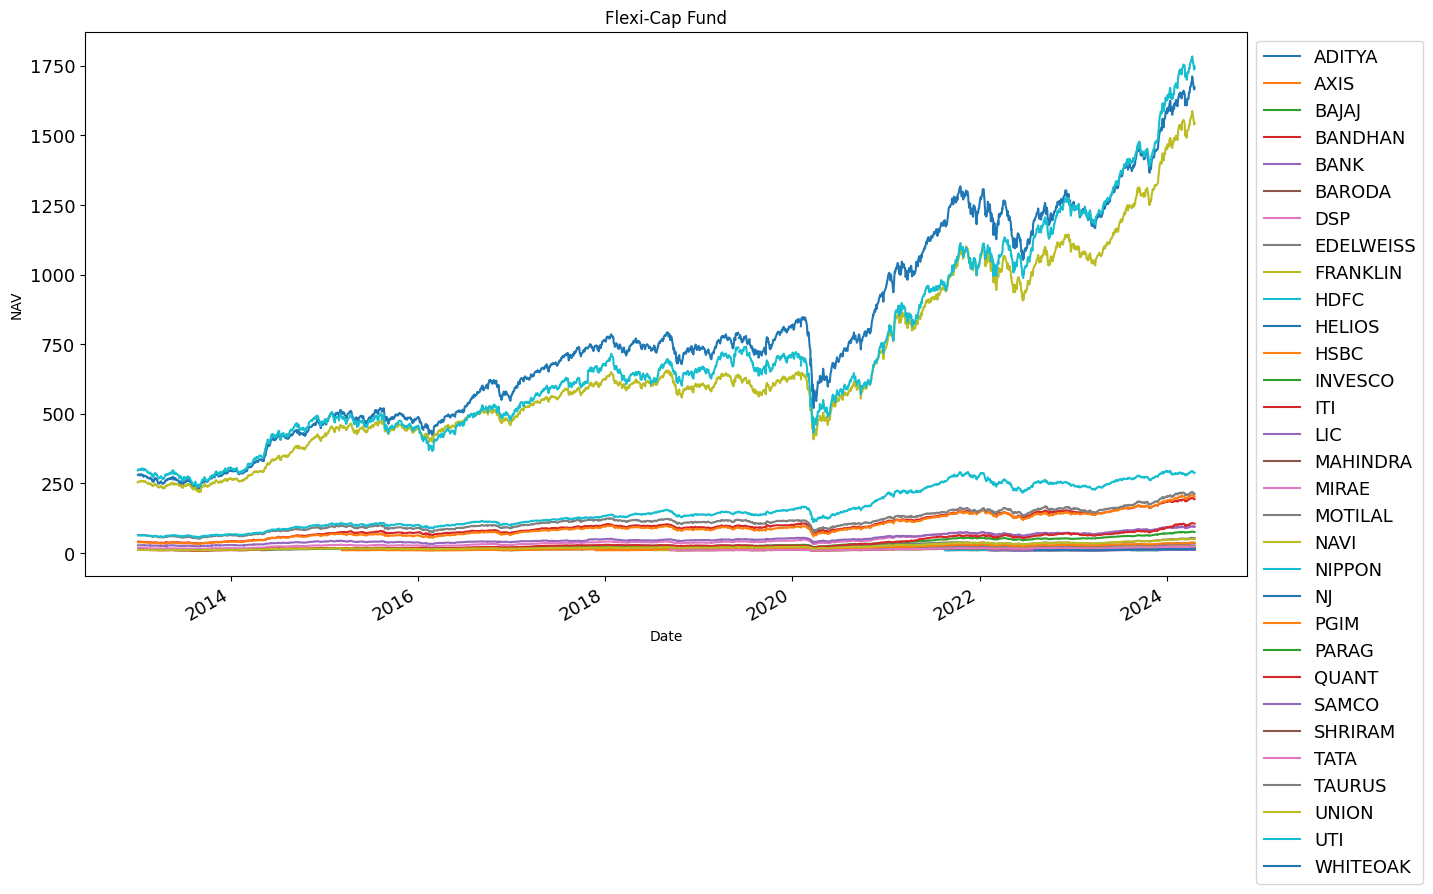

In [5]:
com_hist_nav = pd.concat(hist_nav, axis=1)
com_hist_nav
com_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.title('Flexi-Cap Fund')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.legend(fontsize = 13, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [6]:
norm_com_hist_nav = {}
for scheme_name in com_hist_nav.columns:
    start_value = com_hist_nav[scheme_name].iloc[0]
    if pd.isnull(start_value):
        first_valid_index = com_hist_nav[scheme_name].first_valid_index()
        value = com_hist_nav.loc[first_valid_index, scheme_name]
        norm_com_hist_nav[scheme_name] = com_hist_nav[scheme_name].div(value).mul(10)
    else:
        norm_com_hist_nav[scheme_name] = com_hist_nav[scheme_name].div(start_value).mul(10)
norm_com_hist_nav = pd.DataFrame(norm_com_hist_nav)
norm_com_hist_nav

ADITYA       AXIS      BAJAJ    BANDHAN       BANK     BARODA  \
date                                                                           
2013-01-01        NaN        NaN        NaN        NaN        NaN        NaN   
2013-01-02  10.000000        NaN        NaN  10.000000        NaN        NaN   
2013-01-03  10.059522        NaN        NaN  10.036803        NaN        NaN   
2013-01-04  10.077343        NaN        NaN  10.062307        NaN        NaN   
2013-01-07  10.054175        NaN        NaN  10.032668        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2024-04-12  60.476530  24.945055  12.172307  48.438008  33.466135  14.238671   
2024-04-15  59.726628  24.575425  12.044524  47.855553  33.037849  14.077450   
2024-04-16  59.569804  24.435564  12.085455  47.712032  33.097610  14.037070   
2024-04-18  59.332430  24.405594  12.073475  47.498104  33.037849  14.012942   
2024-04-19  59.622911  24.545455  12.094439  47.679291  33.047809  14.037070   

                  DSP  EDELWEISS   FRANKLIN       HDFC  ...       PGIM  \
date                                                    ...              
2013-01-01        NaN        NaN  10.000000  10.000000  ...        NaN   
2013-01-02  10.000000        NaN  10.035315  10.091890  ...        NaN   
2013-01-03  10.024742        NaN  10.086775  10.111831  ...        NaN   
2013-01-04  10.029140        NaN  10.115987  10.130896  ...        NaN   
2013-01-07  10.025291        NaN  10.126658  10.104758  ...        NaN   
...               ...        ...        ...        ...  ...        ...   
2024-04-12  52.485705  36.874631  62.075534  59.540448  ...  36.873747   
2024-04-15  51.925445  36.421964  61.310580  58.960037  ...  36.342685   
2024-04-16  51.785243  36.267467  61.030957  58.846050  ...  36.212425   
2024-04-18  51.690125  35.983074  60.661465  58.488494  ...  36.012024   
2024-04-19  51.957884  36.071639  60.844877  58.861983  ...  36.142285   

                PARAG      QUANT      SAMCO    SHRIRAM       TATA     TAURUS  \
date                                                                           
2013-01-01        NaN        NaN        NaN        NaN        NaN        NaN   
2013-01-02        NaN        NaN        NaN        NaN        NaN  10.000000   
2013-01-03        NaN        NaN        NaN        NaN        NaN  10.027872   
2013-01-04        NaN        NaN        NaN        NaN        NaN  10.030969   
2013-01-07        NaN  10.000000        NaN        NaN        NaN  10.000000   
...               ...        ...        ...        ...        ...        ...   
2024-04-12  76.713037  89.705285  12.114228  23.001117  22.710395  33.674512   
2024-04-15  75.836167  88.596412  11.923848  22.689385  22.431770  33.175906   
2024-04-16  75.796764  88.738063  11.903808  22.707059  22.409852  33.096934   
2024-04-18  75.335027  88.661363  11.893788  22.573692  22.349803  32.748529   
2024-04-19  75.406433  88.516859  11.773547  22.674962  22.451986  32.887891   

                UNION        UTI   WHITEOAK  
date                                         
2013-01-01        NaN        NaN        NaN  
2013-01-02  10.000000  10.000000        NaN  
2013-01-03  10.036496  10.020514        NaN  
2013-01-04  10.072993  10.050497        NaN  
2013-01-07  10.045620  10.029983        NaN  
...               ...        ...        ...  
2024-04-12  45.866788  46.249061  14.830754  
2024-04-15  45.310219  45.678870  14.655017  
2024-04-16  45.218978  45.401278  14.650025  
2024-04-18  45.145985  45.223765  14.581128  
2024-04-19  45.273723  45.414502  14.623065  

[2798 rows x 31 columns]

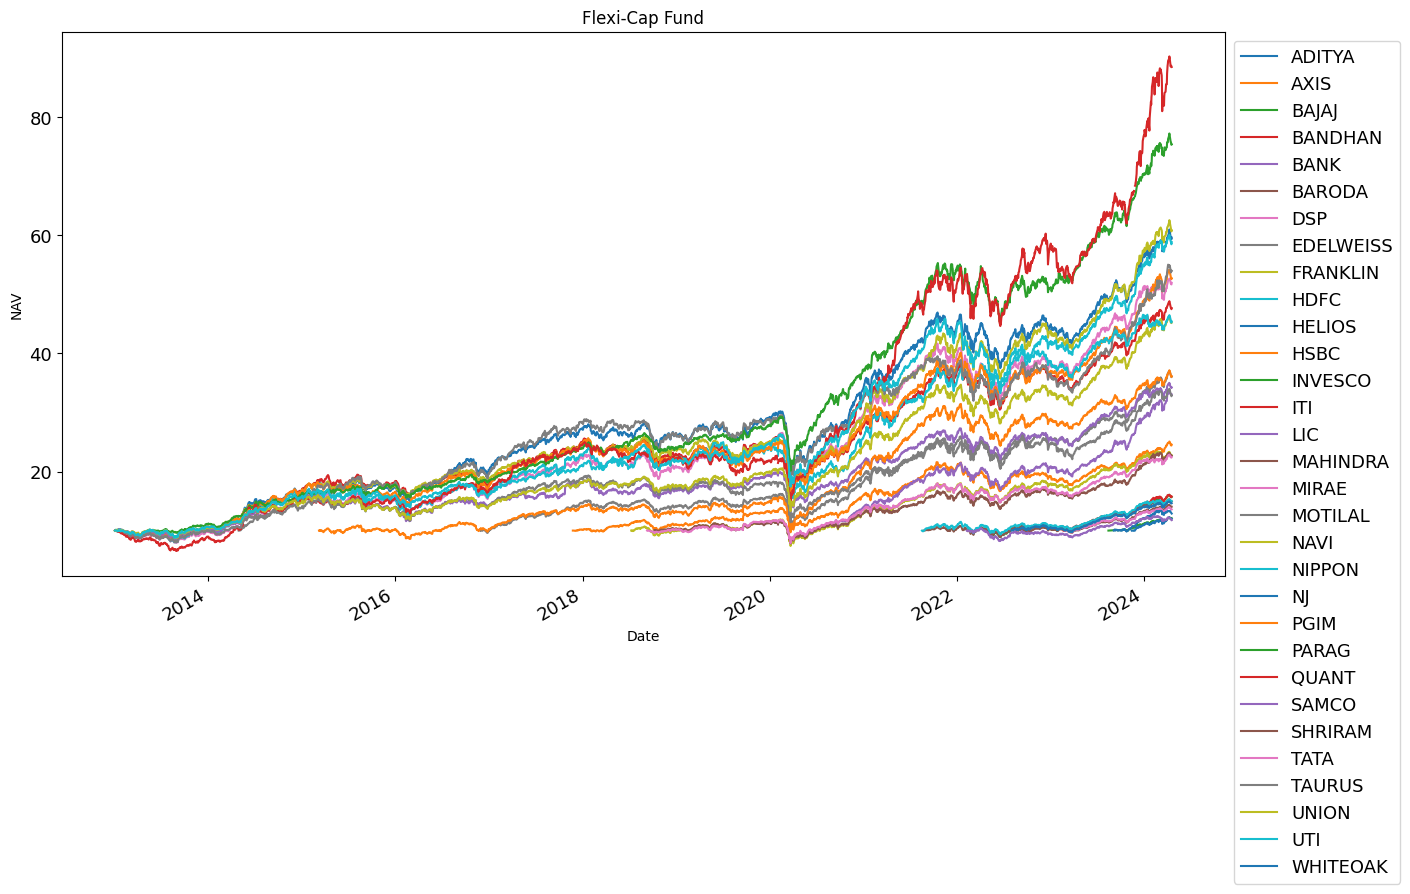

In [7]:
norm_com_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.title('Flexi-Cap Fund')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.legend(fontsize = 13, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

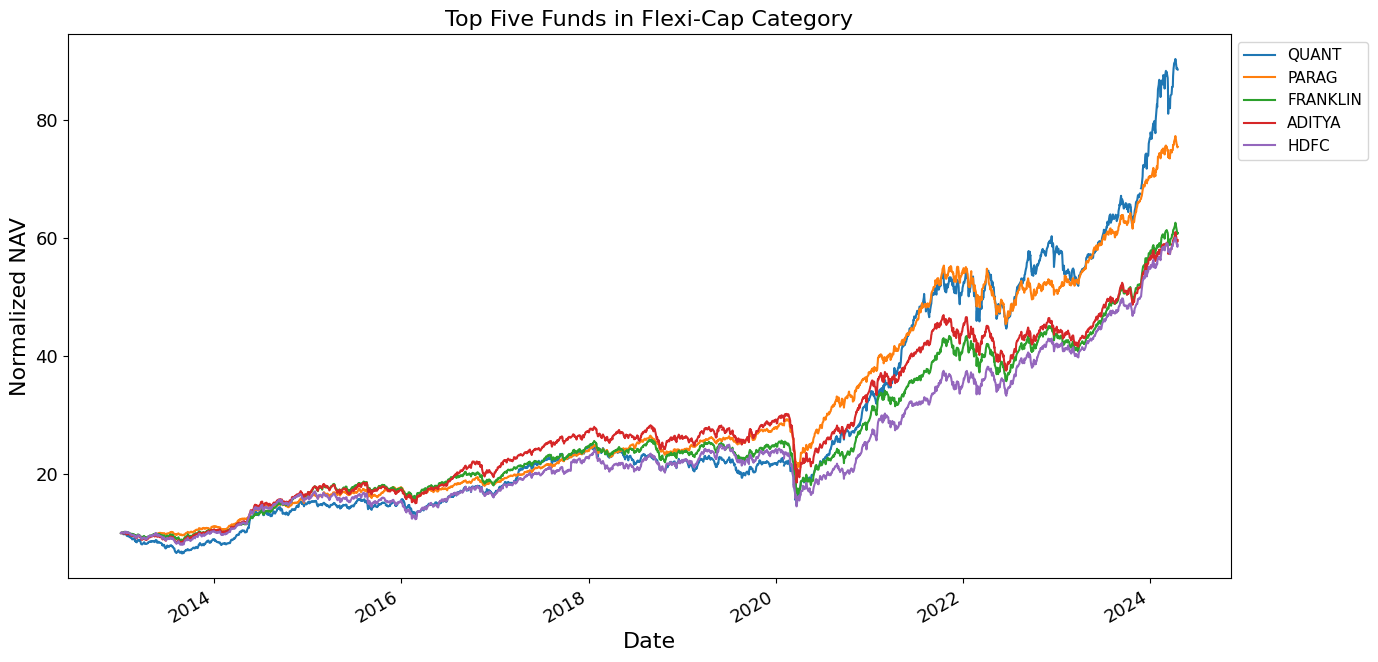

In [8]:
last_value = norm_com_hist_nav.iloc[-1].sort_values(ascending=False)
top_five_columns = last_value.head(5).index
norm_com_hist_nav[top_five_columns].plot(figsize=(15, 8), fontsize=13)

# Customizing plot labels
plt.title('Top Five Funds in Flexi-Cap Category', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Normalized NAV', fontsize=16)
plt.legend(fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.show()

120197 ICICI Prudential Liquid Fund - Direct Plan - Growth
(3546, 4) ICICI Prudential Liquid Fund - Direct Plan - Growth


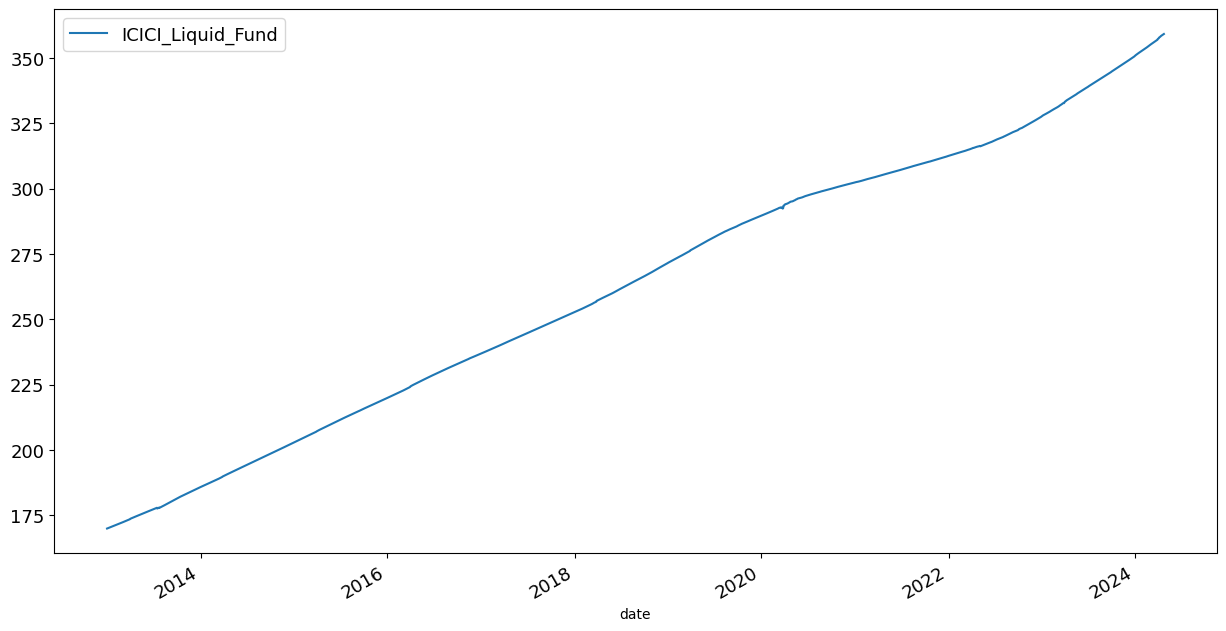

In [9]:
liquid_fund = {}
result = mf.get_available_schemes('ICICI Prudential Liquid')
for scheme_code, scheme in result.items():
    if 'Direct' in scheme and 'Growth' in scheme:
        print(scheme_code, scheme)
        liquid_fund[scheme_code] = scheme

for mutual_fund_code, mutual_fund in liquid_fund.items():
    gilt_fund_hist_nav = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
    gilt_fund_hist_nav['schemeName'] = mutual_fund
    print(gilt_fund_hist_nav.shape, gilt_fund_hist_nav.schemeName[0])
    scheme_name = gilt_fund_hist_nav.schemeName[0].split()[0].upper()
    gilt_fund_hist_nav[f'{scheme_name}_Liquid_Fund'] = gilt_fund_hist_nav['nav'].astype(float)
    gilt_fund_hist_nav['date'] = pd.to_datetime(gilt_fund_hist_nav['date'], format='%d-%m-%Y')
    gilt_fund_hist_nav = gilt_fund_hist_nav.sort_values('date').reset_index(drop=True)
    gilt_fund_hist_nav = gilt_fund_hist_nav.set_index((gilt_fund_hist_nav.date))
    gilt_fund_hist_nav.drop(['nav','dayChange', 'schemeName'], axis=1, inplace=True)

gilt_fund_hist_nav['ICICI_Liquid_Fund'].plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [10]:
# Risk Free Return
def cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1
gilt_fund_hist_nav = gilt_fund_hist_nav.set_index('date')
gilt_fund_hist_nav.head()

ICICI_Liquid_Fund
date                         
2013-01-01           169.9082
2013-01-02           169.9483
2013-01-03           169.9880
2013-01-04           170.0278
2013-01-06           170.1058

In [11]:
resampled_nav_first = gilt_fund_hist_nav['ICICI_Liquid_Fund'].resample('Y').first()
resampled_nav_last = gilt_fund_hist_nav['ICICI_Liquid_Fund'].resample('Y').last()
start_value = resampled_nav_last.iloc[0]
end_value = resampled_nav_last.iloc[-1]
periods = len(resampled_nav_last)
cagr_returns = cagr(start_value, end_value, periods)*100
cagr_returns 

5.648668887713026

In [12]:
risk_free_rate = 0.07
window_daily = 252
window_monthly = 12
# https://freedium.cfd/https://medium.com/@crisvelasquez/dynamic-risk-management-using-rolling-stock-price-metrics-in-python-5d6ffcbf5ba
# Rolling Statistics
def calculate_rolling_metrics(data, returns_column, risk_free_rate, window_daily, window_monthly):

    # If your returns are already on a daily basis and your risk-free rate is also daily, 
    # then you don't need to multiply by sqrt(252) because it's already included in the daily returns.
    risk_free_rate_daily = risk_free_rate/252
   
    # Daily  
    daily_ret = data[returns_column].pct_change().dropna()
    daily_roll_ret = daily_ret.rolling(window=window_daily).mean()
    daily_roll_ret_pct = daily_roll_ret.mul(100)
    
    # Monthly
    monthly_ret = data[returns_column].resample('M').apply(lambda x: x[-1]/x[0] - 1)
    monthly_roll_ret_pct = monthly_ret.rolling(window=window_monthly).mean().mul(100)
    
    ###################################################################################################################################################################
    # Sharpe Ratio 
    # The Sharpe Ratio, named after its founder William F. Sharpe, is a metric used to evaluate the risk-adjusted performance of an investment. 
    #Specifically, it measures the excess return for each unit of risk taken by an investment, with the risk typically represented by the standard deviation of returns. 
    #A higher Sharpe Ratio indicates that the investment is providing a higher return for its level of risk. When calculated over a rolling window, 
    #the Sharpe Ratio provides a dynamic view of how the risk-return trade-off evolves over time.
    ###################################################################################################################################################################
    
    rolling_sharpe = daily_ret.rolling(252).apply(lambda x: (x.mean() - risk_free_rate_daily) / x.std(), raw = True)

    ###################################################################################################################################################################
    # Sortion Ratio
    #The Sortino Ratio is a variation of the Sharpe Ratio that only factors in the downside risk or the negative volatility. Sortino ratio only considers the harmful variance
    #Instead of assessing total volatility as a measure of risk (like the Sharpe Ratio), 
    #The Sortino Ratio focuses solely on the unwanted variability, or the risk of achieving returns below a desired threshold — typically known as the Minimum Acceptable Return (MAR). 
    #This offers a more tailored evaluation of risk by only considering the negative outcomes.
    ###################################################################################################################################################################
    
    MAR = 0 
    rolling_sortino = daily_ret.rolling(252).apply(lambda x: np.mean(x - MAR) / np.sqrt(np.mean(np.minimum(0, x - MAR) ** 2))).dropna()
    threshold = rolling_sortino.mean()
    
    ###################################################################################################################################################################
    # Maximum Drawdown 
    #The maximum drawdown (MDD) is a risk metric that measures the largest single drop from peak to bottom in the value of a portfolio. 
    #In other words, it quantifies the maximum loss an investor could have experienced if they bought at the highest point before a downturn and sold at the subsequent trough. 
    #MDD is a significant indicator because it gives investors an idea of the worst-case scenario for a given investment, as seen historically.
    #Maximum Drawdown (MDD): A measure of the largest single drop from peak to trough in the value of a portfolio, indicating the highest potential loss and the risk of the chosen strategy.
    #Cumulative Minimum Value refers to the lowest value of the cumulative returns after the Cumulative Maximum Value within the rolling period.
    #Cumulative Maximum Value is the highest cumulative return value achieved before the drawdown starts
    ###################################################################################################################################################################
    
    rolling_cumulative = (1 + daily_ret).cumprod()
    rolling_max = rolling_cumulative.rolling(252, min_periods=1).max()
    rolling_drawdown = (rolling_cumulative - rolling_max) / rolling_max
    
    ###################################################################################################################################################################
    # Upside Capture and Downside Capture
    #Capture ratios are useful metrics for understanding how an investment performs relative to a benchmark, especially during up and down market movements. 
    #The Upside Capture Ratio shows how well an investment outperforms a benchmark during periods when the benchmark has positive returns. 
    #Conversely, the Downside Capture Ratio indicates how the investment performs compared to the benchmark during times when the benchmark has negative returns.
    #Rolling Upside Capture: The line indicates how well the stock has outperformed the S&P 500 during periods when the S&P 500 was increasing. 
    #    Values above 100% signify outperformance relative to the benchmark during positive market movements.
    #Rolling Downside Capture: This line illustrates how the stock performed relative to the S&P 500 during times when the S&P 500 was declining. 
    #    Values below 100% are desirable here, as they indicate that the stock fell less than the benchmark during negative market movements.
    ###################################################################################################################################################################
    
    # Create DataFrame for results
    rolling_metrics = pd.DataFrame({
        'NAV_DAILY':data[returns_column],
        'DAILY': daily_roll_ret_pct,
        'MONTHLY': monthly_roll_ret_pct,
        'ROLL_SHARPE_RATIO': rolling_sharpe,
        'ROLL_SORTION_RATIO': rolling_sortino,
        'THRESHOLD':threshold,
        'DOWNSIDE_DEVIATION':rolling_drawdown,
        'SCHEME_NAME':returns_column
    })
    return rolling_metrics

In [13]:
fund_rolling_stats = []
for scheme_name in norm_com_hist_nav.columns:
    i = calculate_rolling_metrics(norm_com_hist_nav, scheme_name, risk_free_rate,window_daily, window_monthly)
    fund_rolling_stats.append(i)
fund_rolling_stats

[            NAV_DAILY     DAILY   MONTHLY  ROLL_SHARPE_RATIO  \
 date                                                           
 2013-01-01        NaN       NaN       NaN                NaN   
 2013-01-02  10.000000       NaN       NaN                NaN   
 2013-01-03  10.059522       NaN       NaN                NaN   
 2013-01-04  10.077343       NaN       NaN                NaN   
 2013-01-07  10.054175       NaN       NaN                NaN   
 ...               ...       ...       ...                ...   
 2024-04-15  59.726628  0.132979       NaN           0.167633   
 2024-04-16  59.569804  0.130682       NaN           0.163873   
 2024-04-18  59.332430  0.129640       NaN           0.162042   
 2024-04-19  59.622911  0.130142       NaN           0.162781   
 2024-04-30        NaN       NaN  2.255443                NaN   
 
             ROLL_SORTION_RATIO  THRESHOLD  DOWNSIDE_DEVIATION SCHEME_NAME  
 date                                                                       

In [14]:
mean_metrics = []
std_metrics = []
schemes_name = []

for scheme in fund_rolling_stats:
    name = scheme['SCHEME_NAME'][0]
    mean = scheme['DAILY'].dropna().mean()*252
    std = scheme['DAILY'].dropna().std()*np.sqrt(252)

    mean_metrics.append(mean)
    std_metrics.append(std)
    schemes_name.append(name)

summary_data = pd.DataFrame({
    'SCHEME_NAME':schemes_name,
    'RETURN': mean_metrics,
    'RISK': std_metrics
})
summary = summary_data.dropna().reset_index(drop=True)
summary.head(5)

SCHEME_NAME     RETURN      RISK
0      ADITYA  18.254297  1.157991
1        AXIS  14.754559  0.949528
2     BANDHAN  15.996847  1.126501
3        BANK  25.050068  1.199113
4      BARODA  24.231346  0.484133

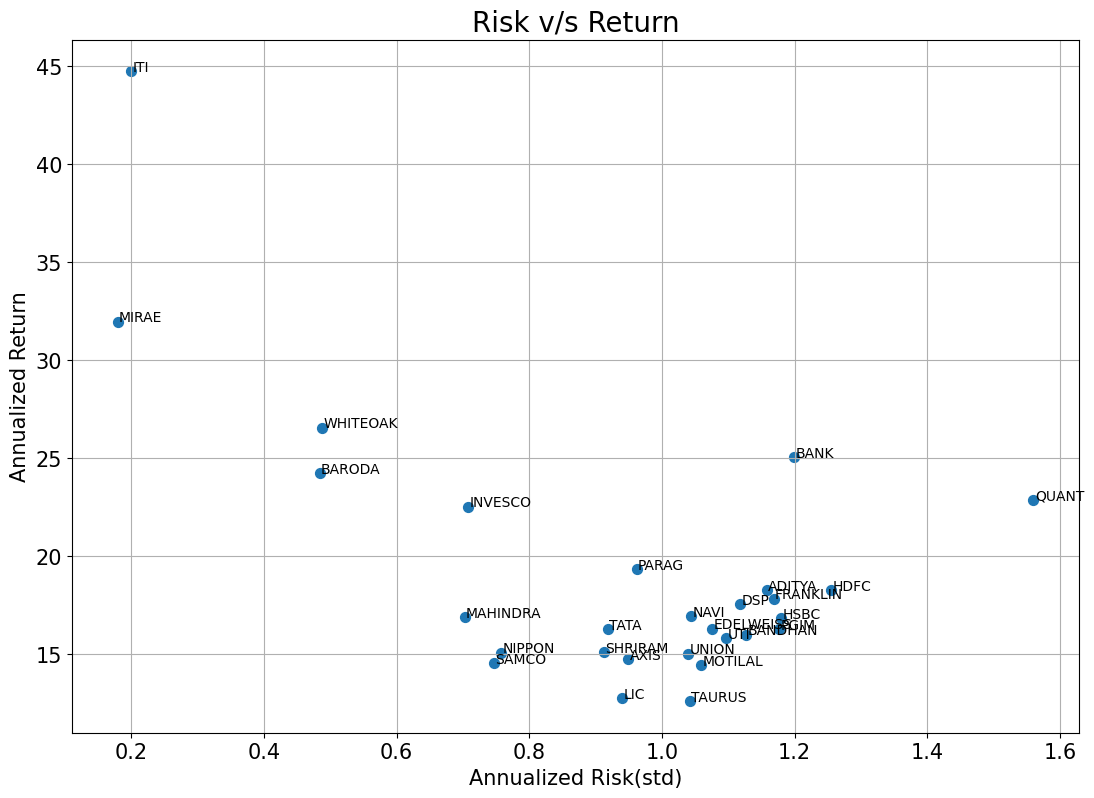

In [15]:
summary.plot(kind="scatter", x="RISK", y="RETURN", figsize=(13, 9), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(summary.loc[i, "SCHEME_NAME"], xy=(summary.loc[i, "RISK"] + 0.002, summary.loc[i, "RETURN"] + 0.002), size=10)
plt.xlabel("Annualized Risk(std)", fontsize=15)
plt.ylabel("Annualized Return", fontsize=15)
plt.title("Risk v/s Return", fontsize=20)
plt.grid()
plt.show()


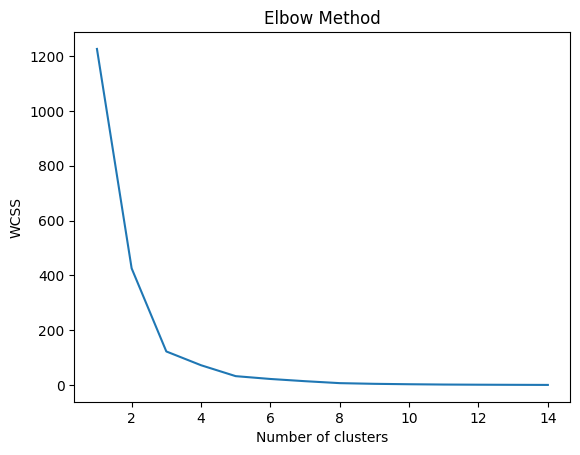

In [16]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(summary[['RISK', 'RETURN']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

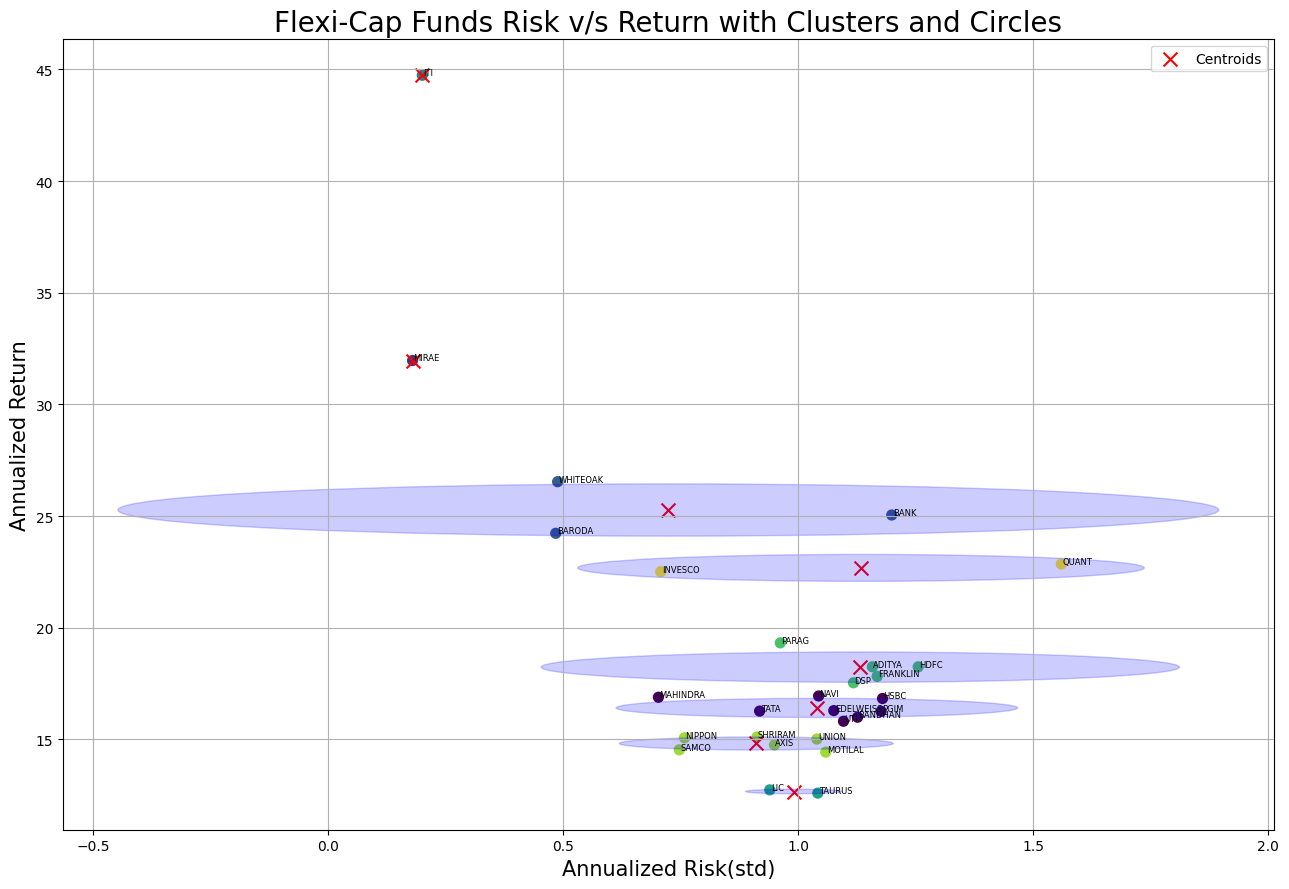

In [19]:
num_clusters = 8
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(summary[['RISK', 'RETURN']])

cluster_labels = kmeans_model.labels_
summary['Cluster'] = cluster_labels

plt.figure(figsize=(13, 9))
plt.scatter(summary['RISK'], summary['RETURN'], c=summary['Cluster'], cmap='viridis', s=50)

for i in summary.index:
    plt.annotate(summary.loc[i, "SCHEME_NAME"], xy=(summary.loc[i, "RISK"]+0.002, summary.loc[i, "RETURN"]+0.002), size=6)
centroids = kmeans_model.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
for i, centroid in enumerate(centroids):
    points_in_cluster = summary[summary['Cluster'] == i]
    std_x = points_in_cluster['RISK'].std()
    std_y = points_in_cluster['RETURN'].std()
    circle = plt.Circle((centroid[0], centroid[1]), max(std_x, std_y), color='blue', alpha=0.2)
    plt.gca().add_patch(circle)

plt.xlabel("Annualized Risk(std)", fontsize=15)
plt.ylabel("Annualized Return", fontsize=15)
plt.title("Flexi-Cap Funds Risk v/s Return with Clusters and Circles", fontsize=20)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()



In [20]:
cluster_index = {}
for roll_stats in fund_rolling_stats:
    scheme_name = roll_stats['SCHEME_NAME'][0]
    if scheme_name in summary['SCHEME_NAME'].values:
        cindex = summary.loc[summary['SCHEME_NAME'] == scheme_name, 'Cluster'].values[0]   
        cname = scheme_name     
        if cindex not in cluster_index:
            cluster_index[cindex] = {} 
        if cname not in cluster_index[cindex]:
            cluster_index[cindex][cname] = []
        cluster_index[cindex][cname].append(roll_stats)


In [ ]:
num_clusters = len(cluster_index)
num_sub_groups = max(len(cname) for cname in cluster_index.values())

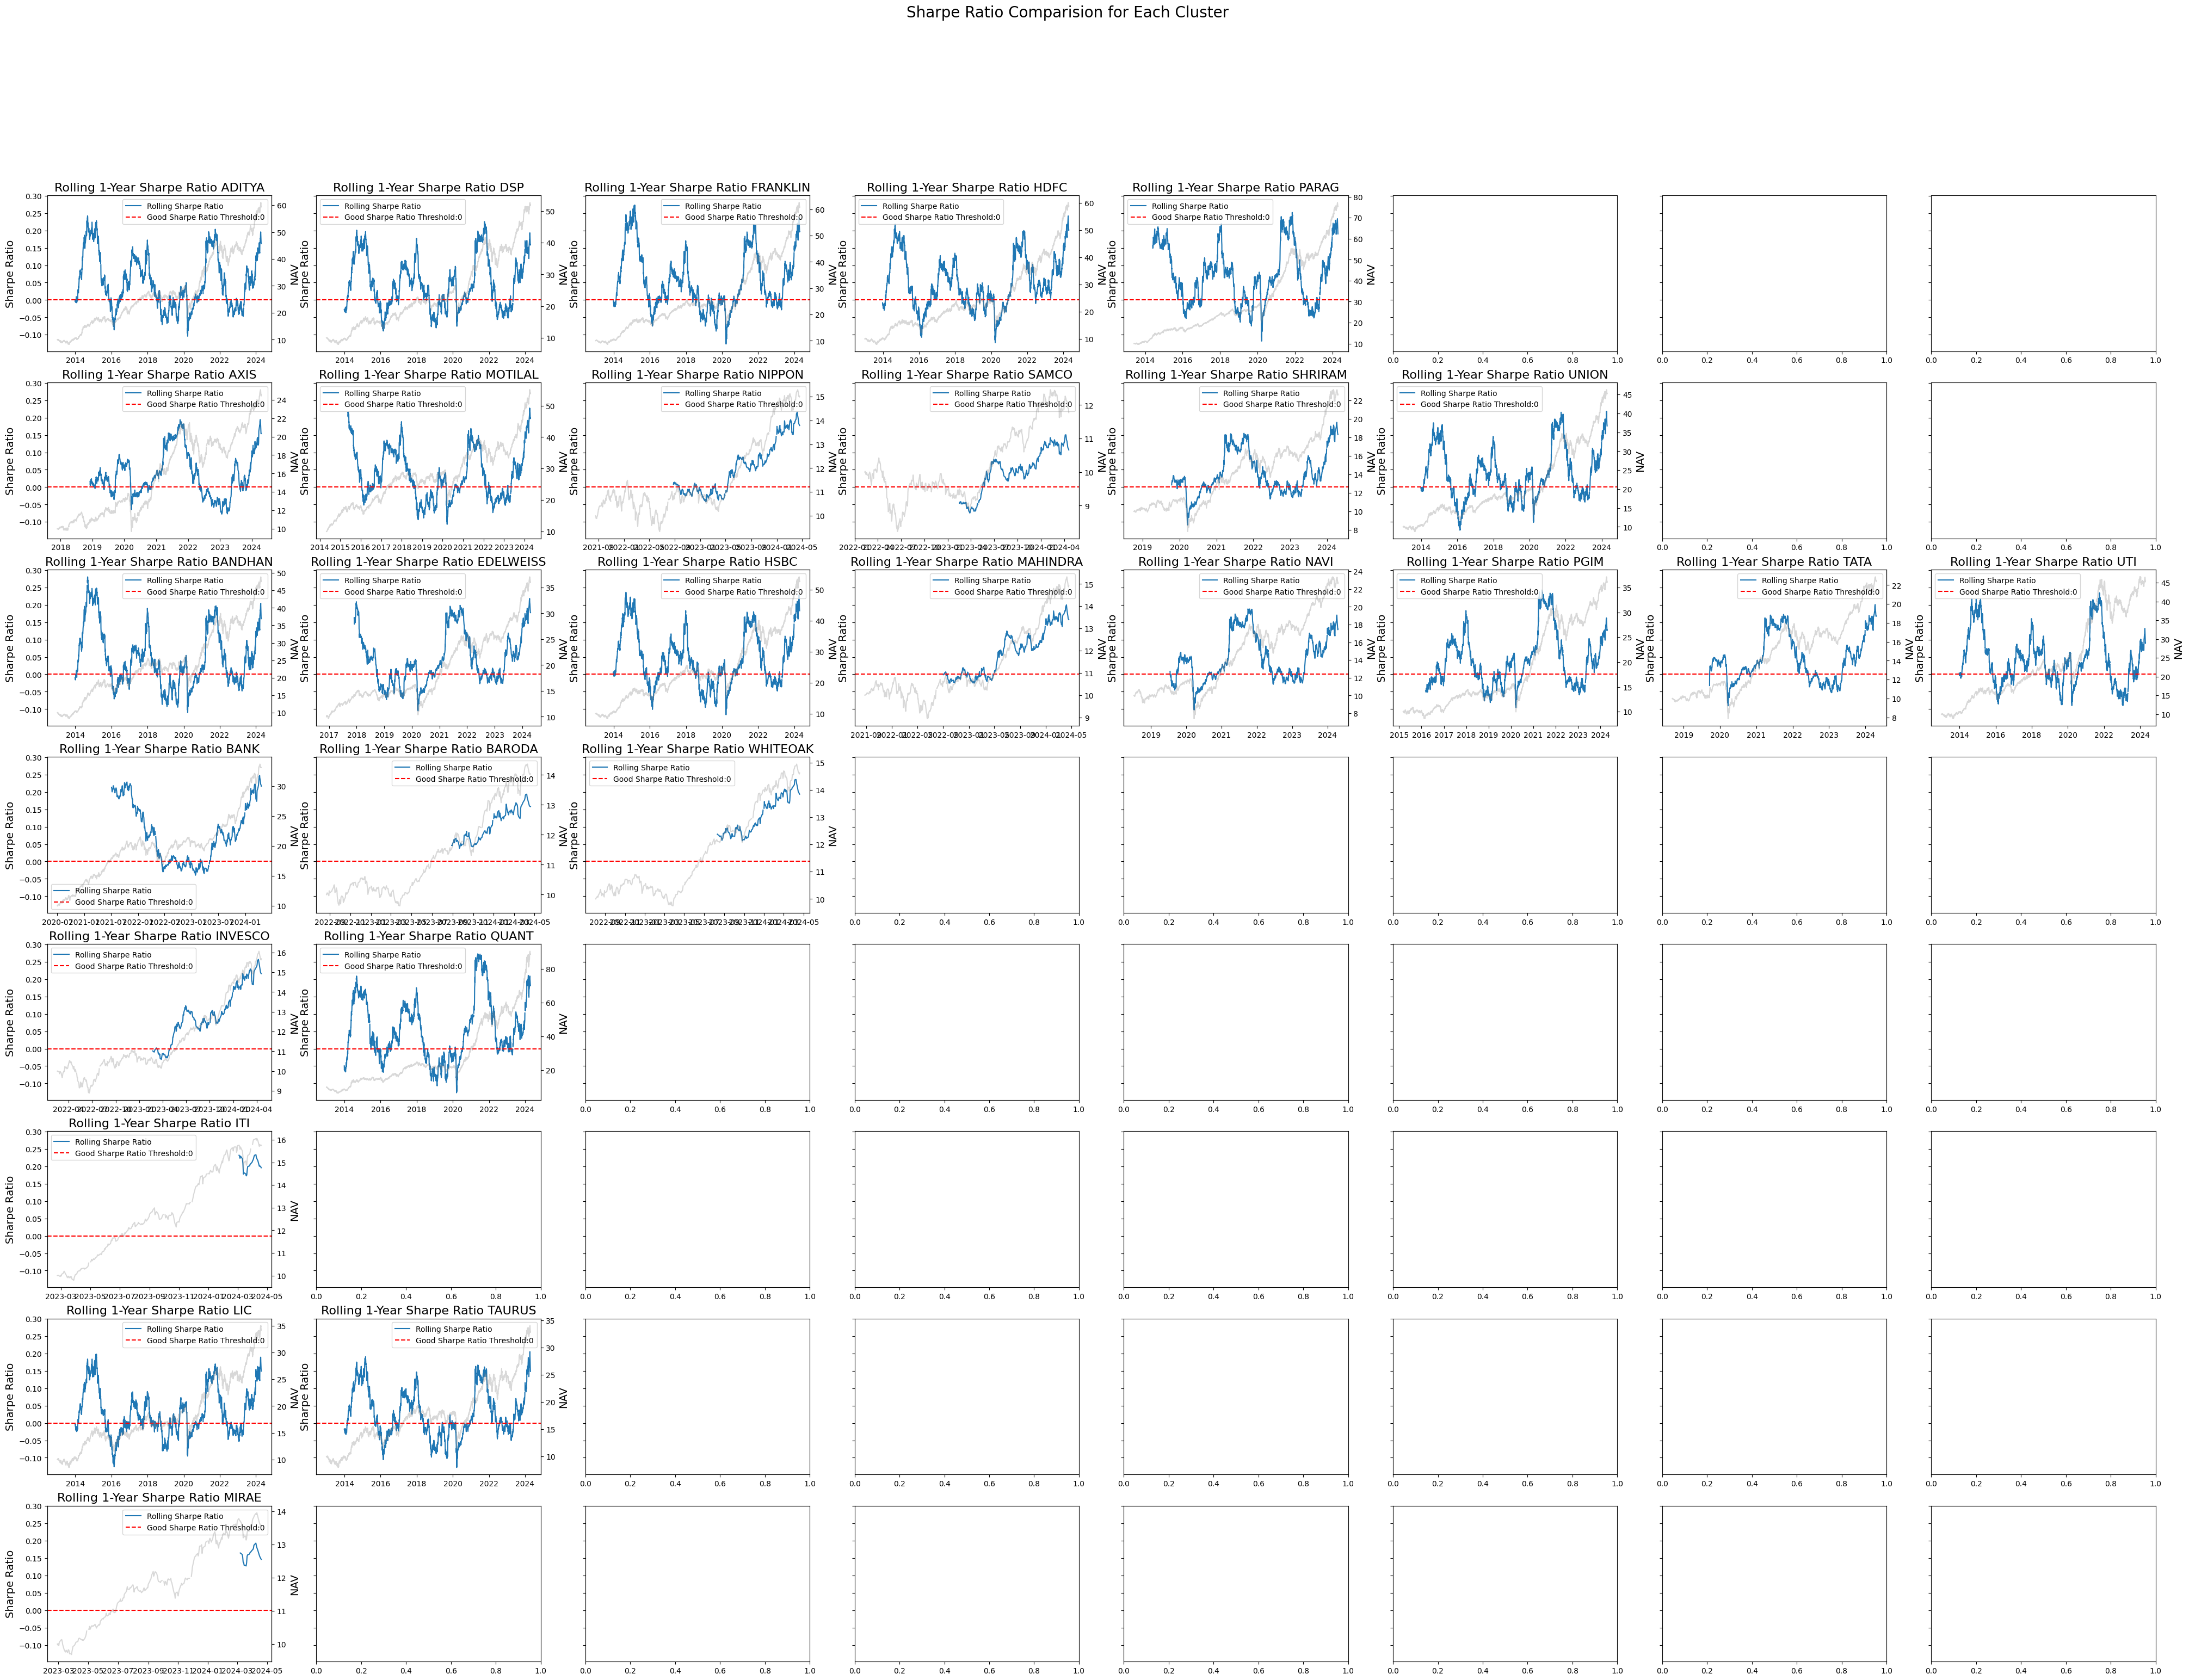

In [34]:
fig, axs = plt.subplots(num_clusters, num_sub_groups, figsize=(50,35), sharey=True)
plt.suptitle('Sharpe Ratio Comparision for Each Cluster', fontsize=20)

for i, (cindex, cname) in enumerate(cluster_index.items()):
    for j, (scheme_id, scheme_data) in enumerate(cname.items()):
        ax1 = axs[i, j] if num_clusters > 1 else axs[j]
        
        # Sharpe Ratio
        if scheme_data:
            for data in scheme_data:
                ax1.plot(data['ROLL_SHARPE_RATIO'], label='Rolling Sharpe Ratio', linewidth=1.5)
                ax1.axhline(y=0, color='red', linestyle='--', label='Good Sharpe Ratio Threshold:0')
                ax1.set_title(f'Rolling 1-Year Sharpe Ratio {data["SCHEME_NAME"][0]}', fontsize=16)
                ax1.set_ylabel('Sharpe Ratio', fontsize=14)
                ax1.legend()

                ax2 = ax1.twinx()
                ax2.plot(data['NAV_DAILY'], color='grey', alpha=0.3, label='NAV')
                ax2.set_ylabel('NAV', fontsize=14)
        else:
            ax1.axis('off')

plt.show()


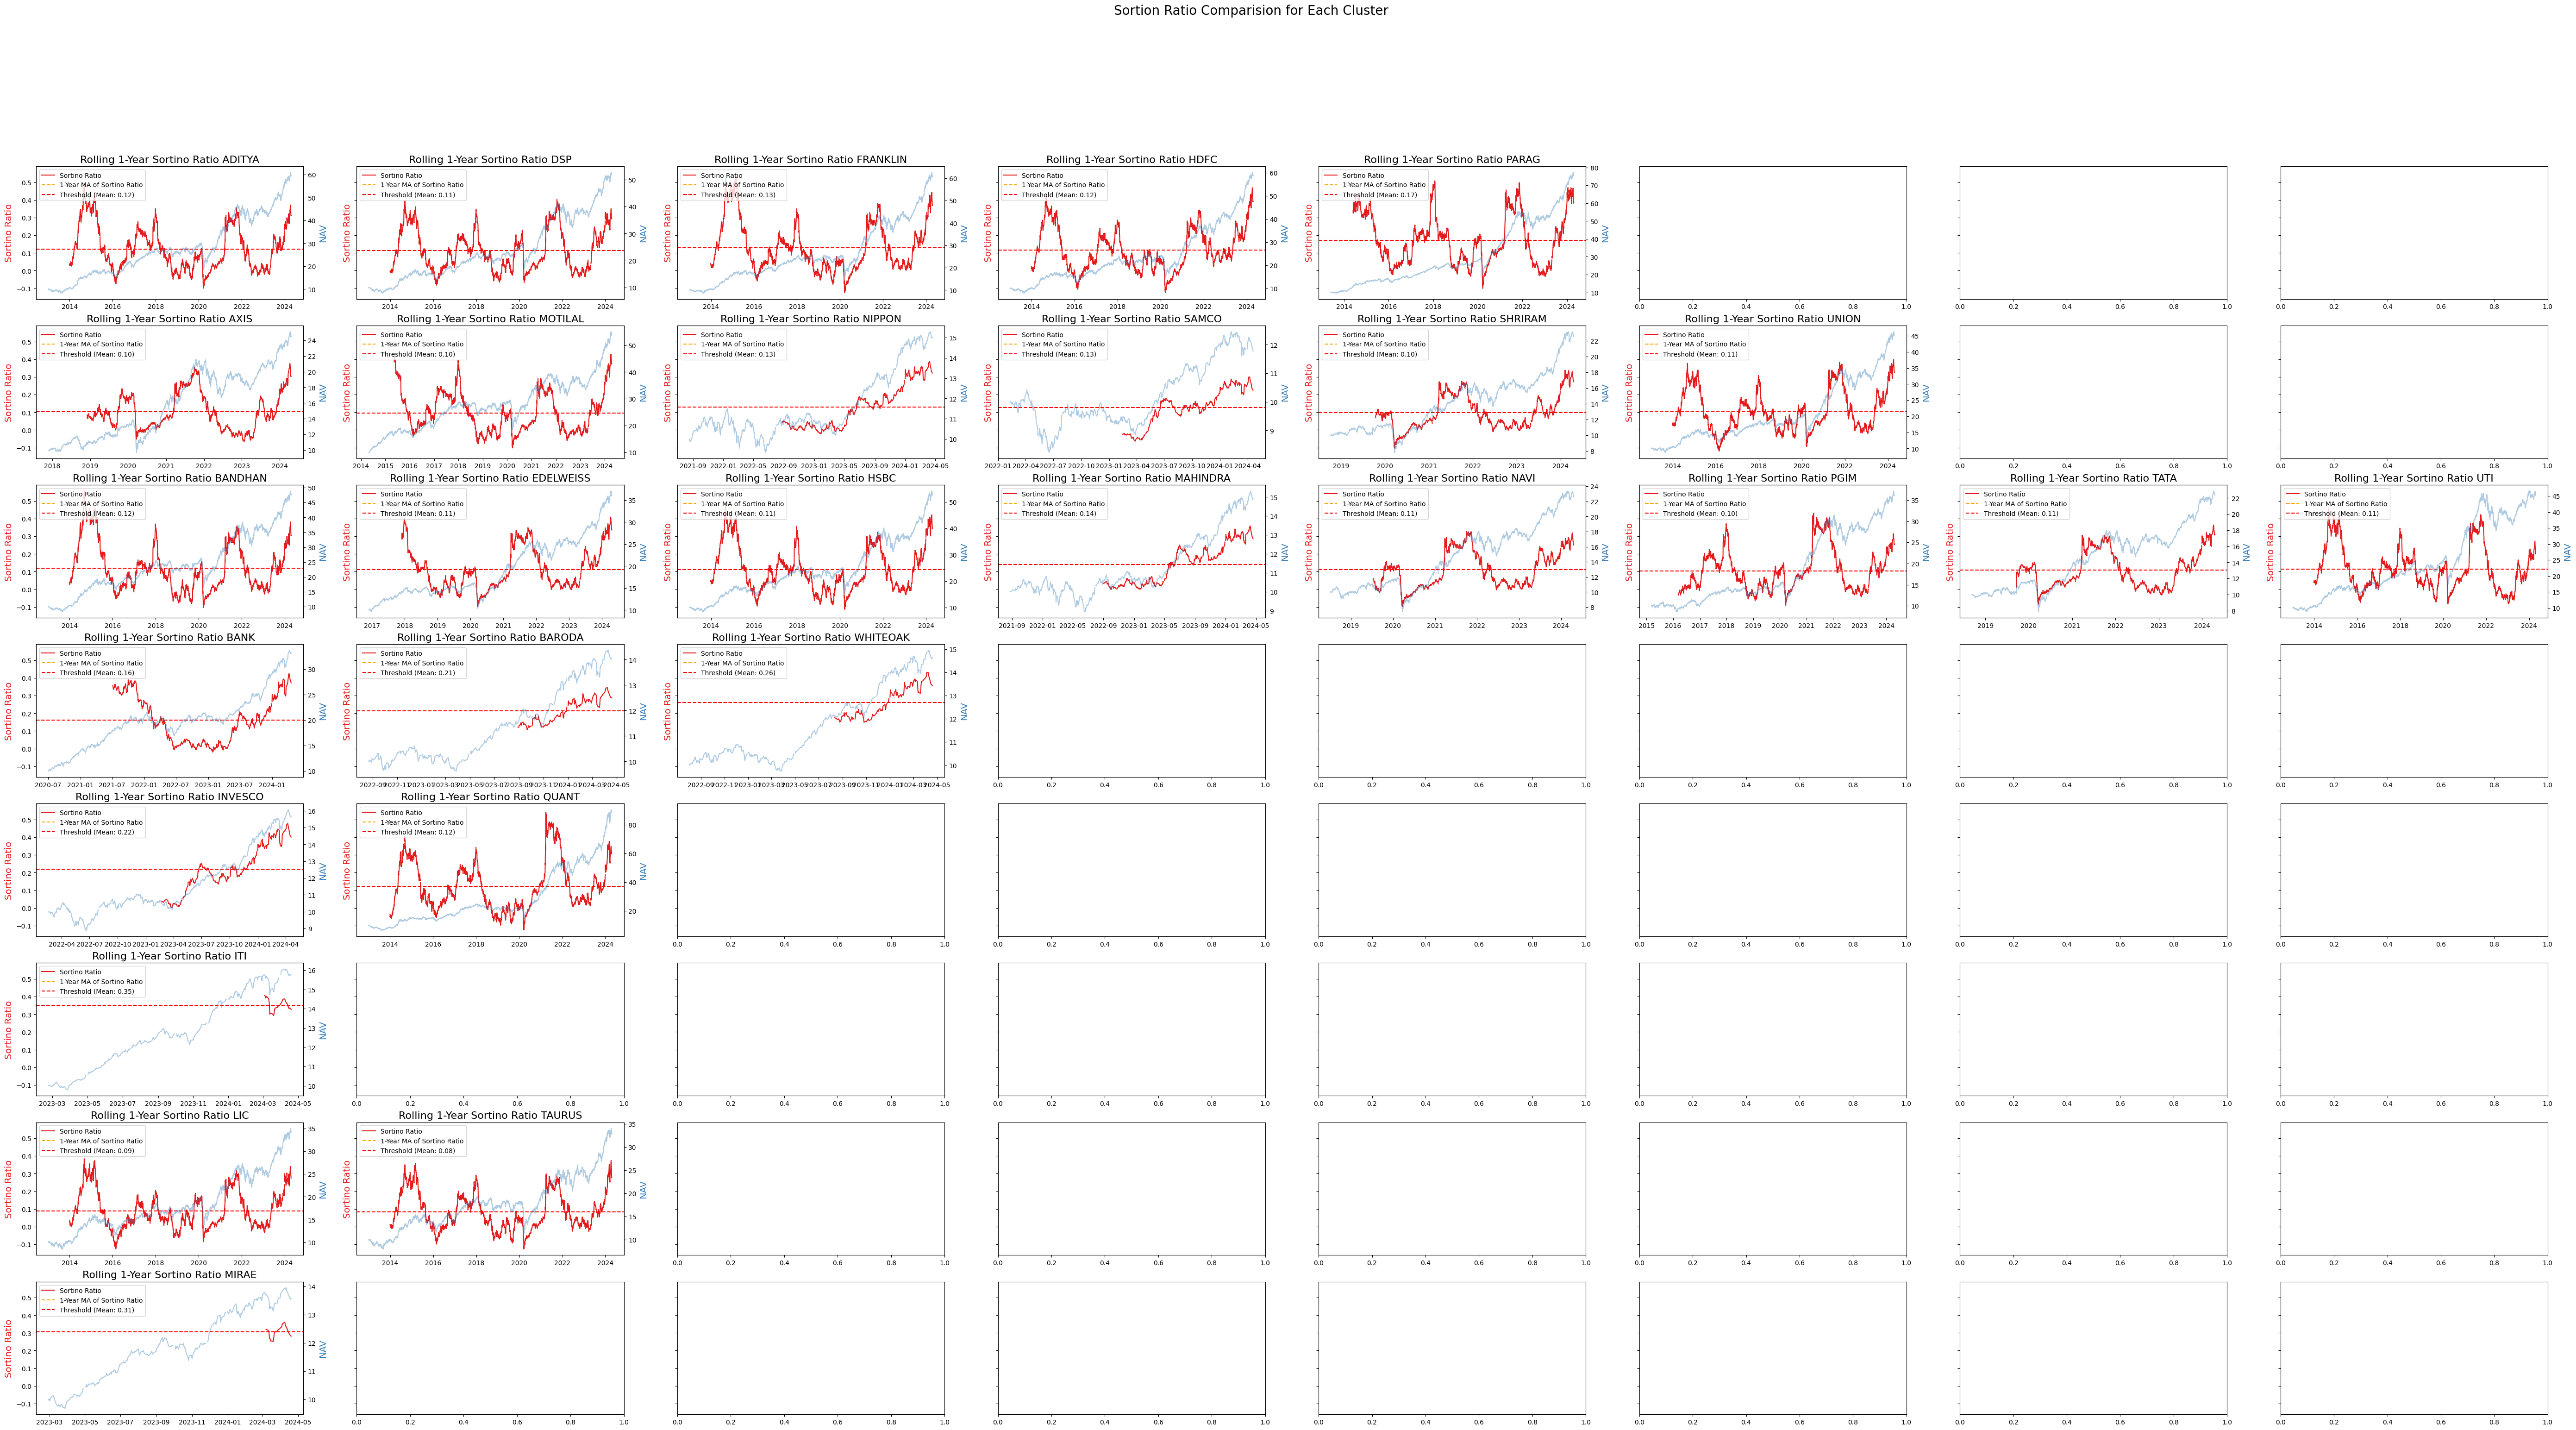

In [36]:
fig, axs = plt.subplots(num_clusters, num_sub_groups, figsize=(70,35) ,sharey=True)
plt.suptitle('Sortion Ratio Comparision for Each Cluster', fontsize=20)

for i, (cindex, cname) in enumerate(cluster_index.items()):
    for j, (scheme_id, scheme_data) in enumerate(cname.items()):
        ax1 = axs[i, j] if num_clusters > 1 else axs[j]
        
        # Sortion Ratio
        if scheme_data:
            for data in scheme_data:
                palette = plt.get_cmap('Set1')
                ax1.plot(data['ROLL_SORTION_RATIO'].index, data['ROLL_SORTION_RATIO'], color=palette(0), linewidth=1.5, label='Sortino Ratio')
                ax1.plot(data['ROLL_SORTION_RATIO'].index, data['ROLL_SORTION_RATIO'].rolling(window=252).mean(), color='orange', linestyle='--', label='1-Year MA of Sortino Ratio')
                ax1.axhline(y=data['THRESHOLD'][0], color='red', linestyle='--', label=f'Threshold (Mean: {data["THRESHOLD"][0]:.2f})')
                ax1.set_ylabel('Sortino Ratio', fontsize=14, color=palette(0))
                ax1.legend(loc='upper left')
                ax1.set_title(f'Rolling 1-Year Sortino Ratio {data["SCHEME_NAME"][0]}', fontsize=16)
                ax2 = ax1.twinx()  
                ax2.plot(data['NAV_DAILY'], color=palette(1), alpha=0.4, label='NAV')
                ax2.set_ylabel('NAV', fontsize=14, color=palette(1))
        else:
            ax1.axis('off')
plt.show()

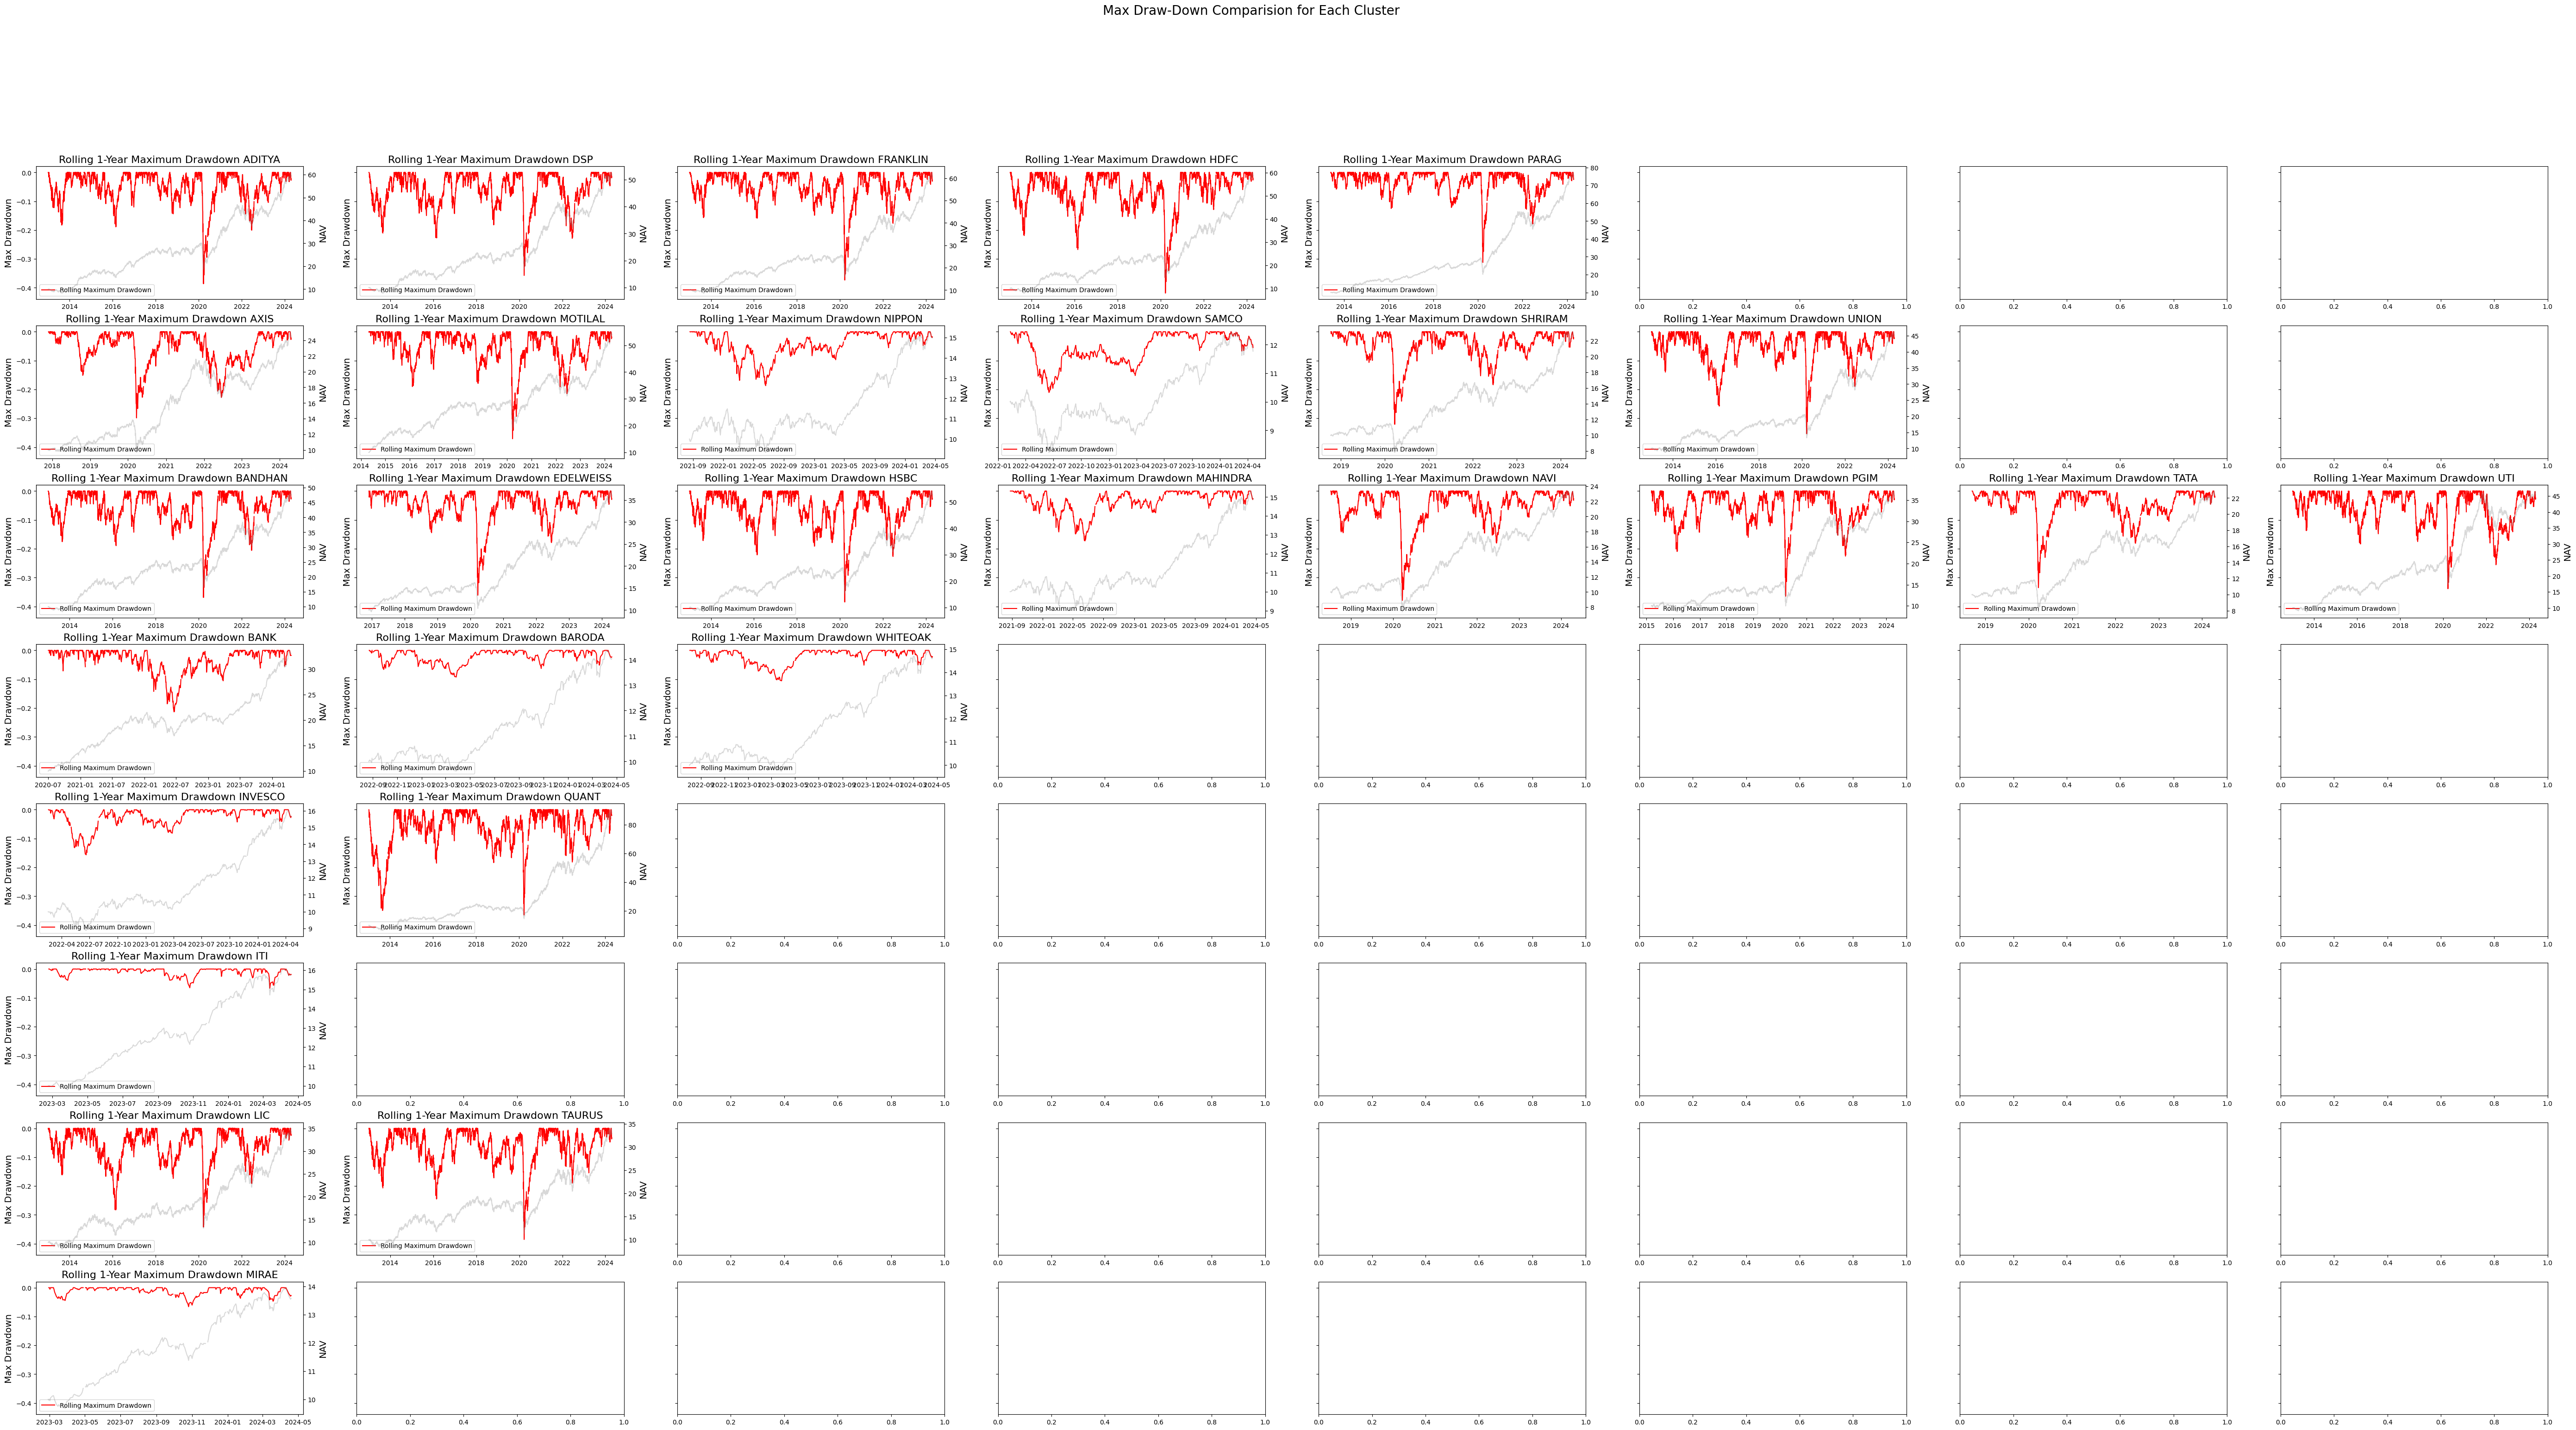

In [38]:
fig, axs = plt.subplots(num_clusters, num_sub_groups, figsize=(70,35),sharey=True)
plt.suptitle('Max Draw-Down Comparision for Each Cluster', fontsize=20)

for i, (cindex, cname) in enumerate(cluster_index.items()):
    for j, (scheme_id, scheme_data) in enumerate(cname.items()):
        ax1 = axs[i, j] if num_clusters > 1 else axs[j]
        
        # Sortion Ratio
        if scheme_data:
            for data in scheme_data:
                ax1.plot(data['DOWNSIDE_DEVIATION'], label='Rolling Maximum Drawdown', linewidth=1.5, color='red')
                ax1.set_title(f'Rolling 1-Year Maximum Drawdown {data["SCHEME_NAME"][0]}', fontsize=16)
                ax1.set_ylabel('Max Drawdown', fontsize=14)
                ax1.legend()

                ax2 = ax1.twinx()
                ax2.plot(data['NAV_DAILY'], color='grey', alpha=0.3, label='NAV')
                ax2.set_ylabel('NAV', fontsize=14)
        else:
            ax1.axis('off')
plt.show()